In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [7]:
# Loading the amazon UK dataset 
file_path = "C:/Users/sophi/Ironhack/Ironhack/Ironhack_prework_Jupyter/Week5/labs/data_source/amz_uk_price_prediction_dataset.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [16]:
#Frequency Tables:

#Generate a frequency table for the product category
# Frequency table for 'category'
frequency_table = df['category'].value_counts()

pd.DataFrame(frequency_table)


,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Alexa Built-In Devices,107
Motorbike Chassis,107
Plugs,107


In [19]:
#Which are the top 5 most listed product categories?
top_5 = frequency_table.head(5)
display(top_5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

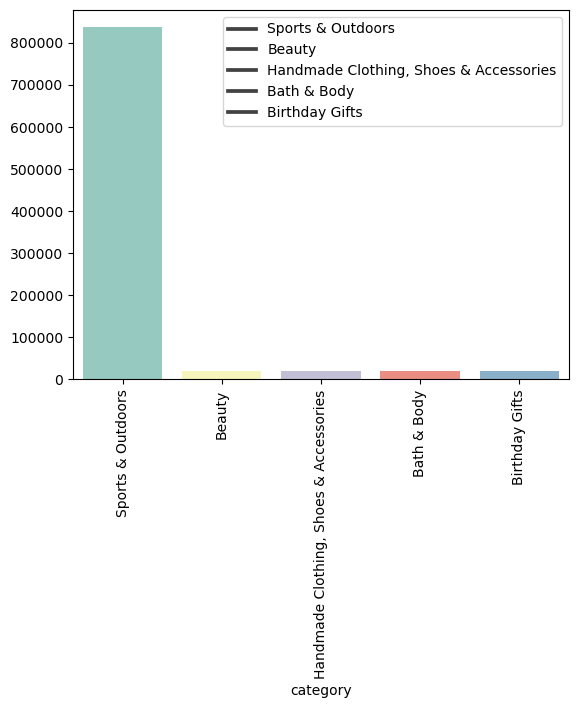

In [28]:
from matplotlib.patches import Patch

sns.barplot(x=top_5.index, y=top_5.values, palette="Set3")
plt.xticks(rotation=90)
plt.legend(top_5.index, loc= "upper right") 

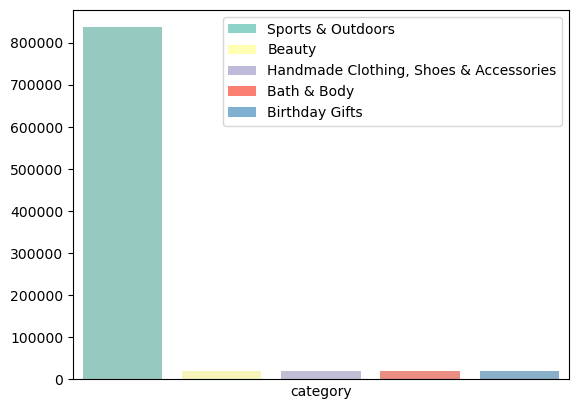

In [33]:
ax = sns.barplot(x=top_5.index, y=top_5.values, palette="Set3")

# Rotating x-axis labels
plt.xticks([])

# Creating a custom legend
legend_elements = [Patch(facecolor=sns.color_palette("Set3")[i], label=top_5.index[i]) for i in range(len(top_5))]
plt.legend(handles=legend_elements, loc="upper right")

plt.show()

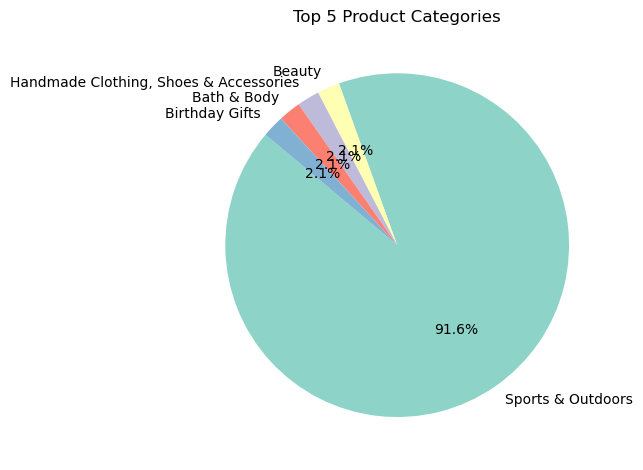

In [47]:
# Plotting a pie chart of the 'Top_5' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
plt.pie(top_5, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"), labels =top_5.index )


# Adding a title
plt.title('Top 5 Product Categories')
# Adjusting layout to prevent overlapping labels
plt.tight_layout()

plt.show()


## the top ordered category is sports and outdoor products

In [48]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [49]:
#Frequency Tables:

#Generate a frequency table for the product category
# Frequency table for 'category'
frequency_table = df['price'].value_counts()

pd.DataFrame(frequency_table)


,count
price,
9.99,48922
12.99,38823
8.99,34058
7.99,33632
14.99,32570
...,...
2398.99,1
1453.08,1
1785.63,1


In [57]:
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode= df['price'].mode()
display(price_mean)
display(price_median)
display(price_mode)

89.24380943923663

19.09

0    9.99
Name: price, dtype: float64

In [60]:
# Comparing mean with mode
if price_mean > price_mode[0]:
    print("The average price point is higher than the most common price point.")
elif price_mean < price_mode[0]:
    print("The average price point is lower than the most common price point.")
else:
    print("The average price point is equal to the most common price point.")

The average price point is higher than the most common price point.


In [68]:
#determining the variance, standard deviation, range, and interquartile range for product price.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price

quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [69]:
# Calculating the first quartile (Q1)
Q1 = np.percentile(df['price'],25)

# Calculating the third quartile (Q3)
Q3 = np.percentile(df['price'],75)

# Calculating the interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for Price:", IQR)

Interquartile Range (IQR) for Price: 36.0


Text(0.5, 1.0, 'Histogram of Prices')

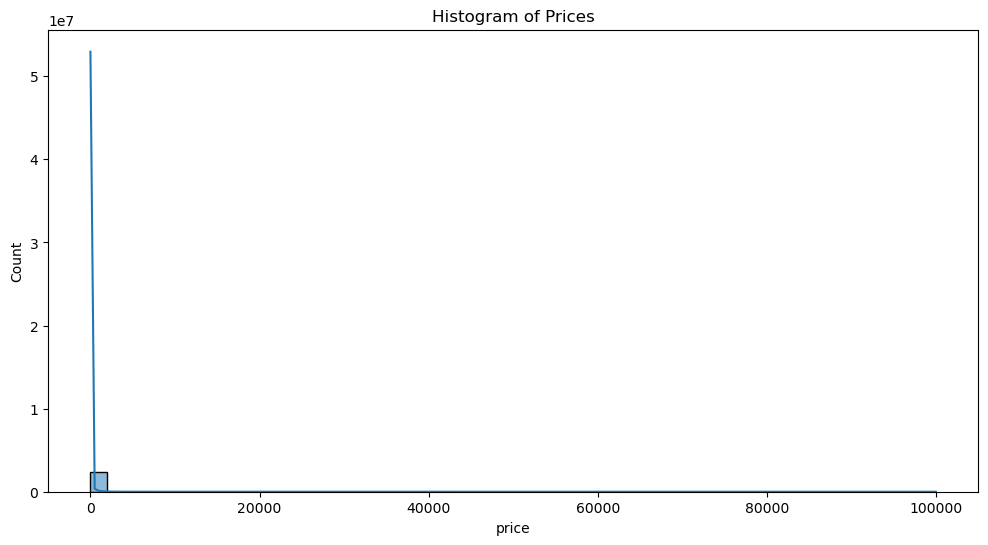

In [77]:
# Visualization for answering the spread of prices using histogram
plt.figure(figsize=(12, 6))

sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histogram of Prices')


In [78]:
skewness_price = df['price'].skew()
skewness_price

27.492977566280338

## difficult to read output as the data is highly skewed to the right with very few items of extremely high price 

In [ ]:
## discretizing to get an idea of the data below. which shows that most of the products are price below price of 10000(units)

In [82]:
# Discretizing 'price' into 4 categories
bins = [0, 10000, 20000, 30000, df['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

In [83]:
df.price_category.value_counts()

price_category
Low          2443484
Medium           154
High              11
Very High          2
Name: count, dtype: int64

<Axes: >

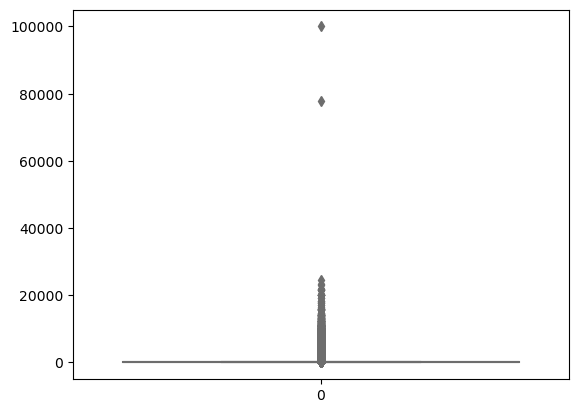

In [76]:
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
#for boxplot
sns.boxplot(data = df['price'], color = 'salmon')

In [ ]:
# Box plot shows to outliers in the upper price range around 80000 and 100000

## Part 3: Unpacking Product Ratings

In [85]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [95]:
stars_mean = df['stars'].mean()
stars_median = df['stars'].median()
stars_mode= df['stars'].mode()
stars_std = df['stars'].std()
stars_min = df['stars'].min()
stars_max = df['stars'].max()

# Print descriptive statistics
print("Mean Rating:", stars_mean)
print("Median Rating:", stars_median)
print("Standard Deviation of Rating:", stars_std)
print("Minimum Rating:", stars_min)
print("Maximum Rating:", stars_max)




Mean Rating: 2.152836472966065
Median Rating: 0.0
Standard Deviation of Rating: 2.1948653785054697
Minimum Rating: 0.0
Maximum Rating: 5.0


In [94]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

In [ ]:
#Skewness is approximately 0.081, indicates a slight skewness towards higher rating values
#based on kurtosis the ratings have thinner tails and a flatter peak than the normal distribution. 

In [ ]:
# Visualization with histogram to see the rating distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['stars'], bins=5, kde=True)
plt.title('Histogram of Ratings')

plt.tight_layout()
plt.show()